# **Diabetes Prediction Using Machine Learning**
In this project we will be predicting that whether the **patient has diabetes or not** on based on the features we will provide to our machine learning model, and for that, we will be using the **famous Pima Indians Diabetes Database**.

1)**Data analysis:** Here one will get to know about how the data analysis part is done in a data science life cycle.

2)**Exploratory data analysis:** EDA is one of the most important steps in the data science project life cycle and here one will need to know that how to make inferences from the visualizations and data analysis.

3)**Model building:** Here we will be using 4 ML models and then we will choose the best performing model.

4)**Saving model:** Saving the best model using pickle to make the prediction from real data.



# Importing the dependencies

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions
import missingno as msno

from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Data Collection

Here we will be reading first 5 rows in the dataset

In [4]:
#loading the diabetes dataset to a pandas dataframe and reading the dataset which is in the CSV format
diabetes_dataset = pd.read_csv('E://3rd year//Y3S2//FDM//FDM_MiniProject//diabetes.csv')

In [5]:
#printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis (EDA)**

---



In [6]:
#no of rows and no of columns
diabetes_dataset.shape

(768, 9)

In [7]:
#what are columns available in our dataset
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#Information about the dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#getting the stastical measures of the data like mean of the data , standard deviation of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Handling the Missing Values**

Now let’s check that if our dataset have null values or not

In [10]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

First we checked that is there any null values from the **IsNull()** function then got the sum of all those missing values from the **sum()** function.

It was mentioned as no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset.

Hence we will first **replace the 0 value with the NAN value** then start the imputation process.

In [11]:
diabetes_dataset = diabetes_dataset.copy(deep = True)
diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [12]:
# Showing the Count of NANs
print(diabetes_dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To have a better Imputation approach we can **apply mean values of each column to the null values of the respective columns**.

Plotting the data distribution plots before removing null values.

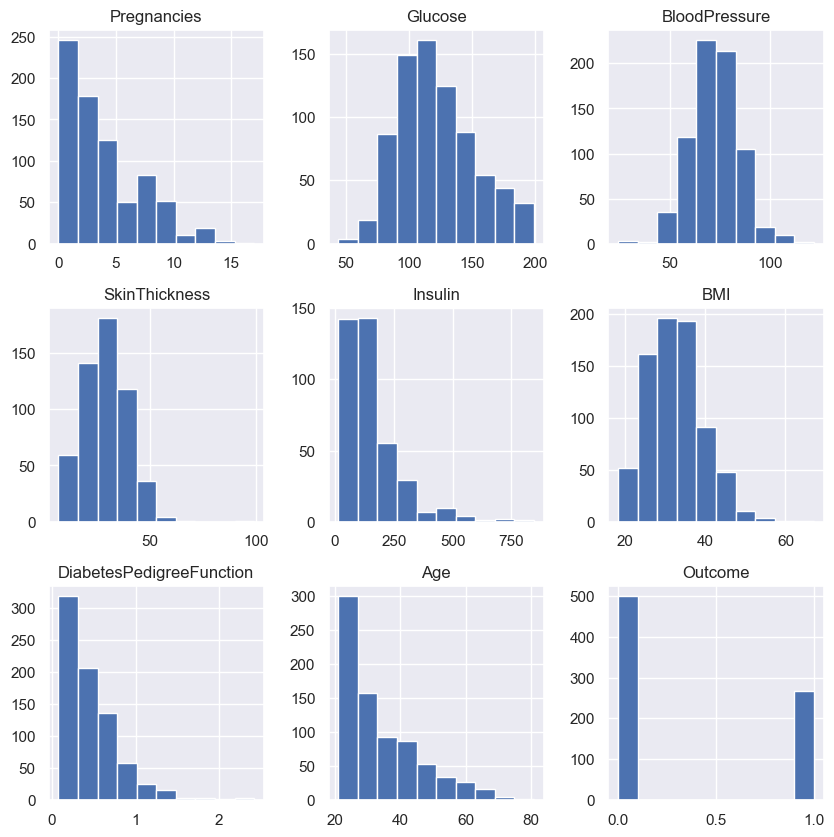

In [13]:
p = diabetes_dataset.hist(figsize = (10,10))

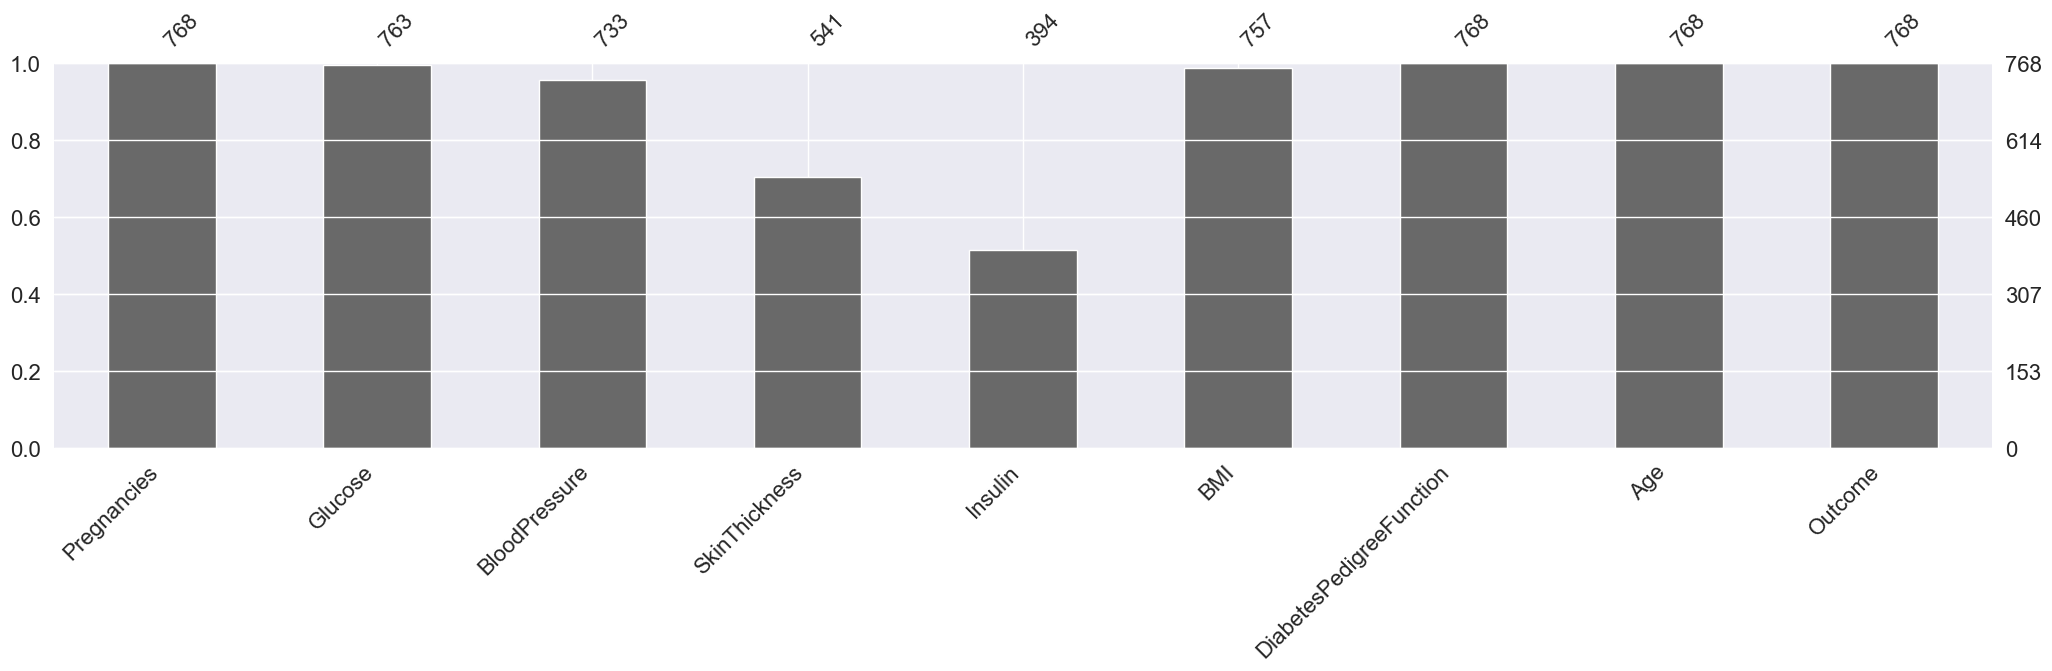

In [14]:
p = msno.bar(diabetes_dataset,figsize = (25,5))

In here we can see the distribution of each features whether it is dependent data or independent data.

 We need to see the distribution of data because it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

imputing the **mean value** **of the column to each missing value of that particular column**

In [15]:
diabetes_dataset['Glucose'].fillna(diabetes_dataset['Glucose'].mean(), inplace = True)
diabetes_dataset['BloodPressure'].fillna(diabetes_dataset['BloodPressure'].mean(), inplace = True)
diabetes_dataset['SkinThickness'].fillna(diabetes_dataset['SkinThickness'].median(), inplace = True)
diabetes_dataset['Insulin'].fillna(diabetes_dataset['Insulin'].median(), inplace = True)
diabetes_dataset['BMI'].fillna(diabetes_dataset['BMI'].median(), inplace = True)

Plotting the distributions after removing the NAN values

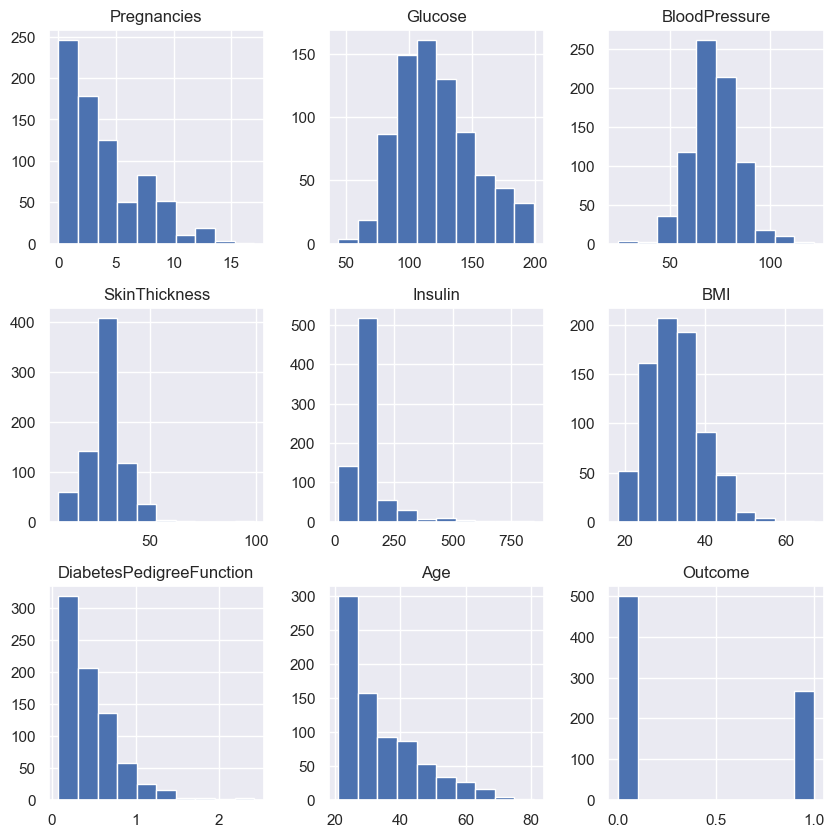

In [16]:
p = diabetes_dataset.hist(figsize = (10,10))

**Plotting Null Count Analysis Plot**

we can clearly see that there are no null values in the dataset

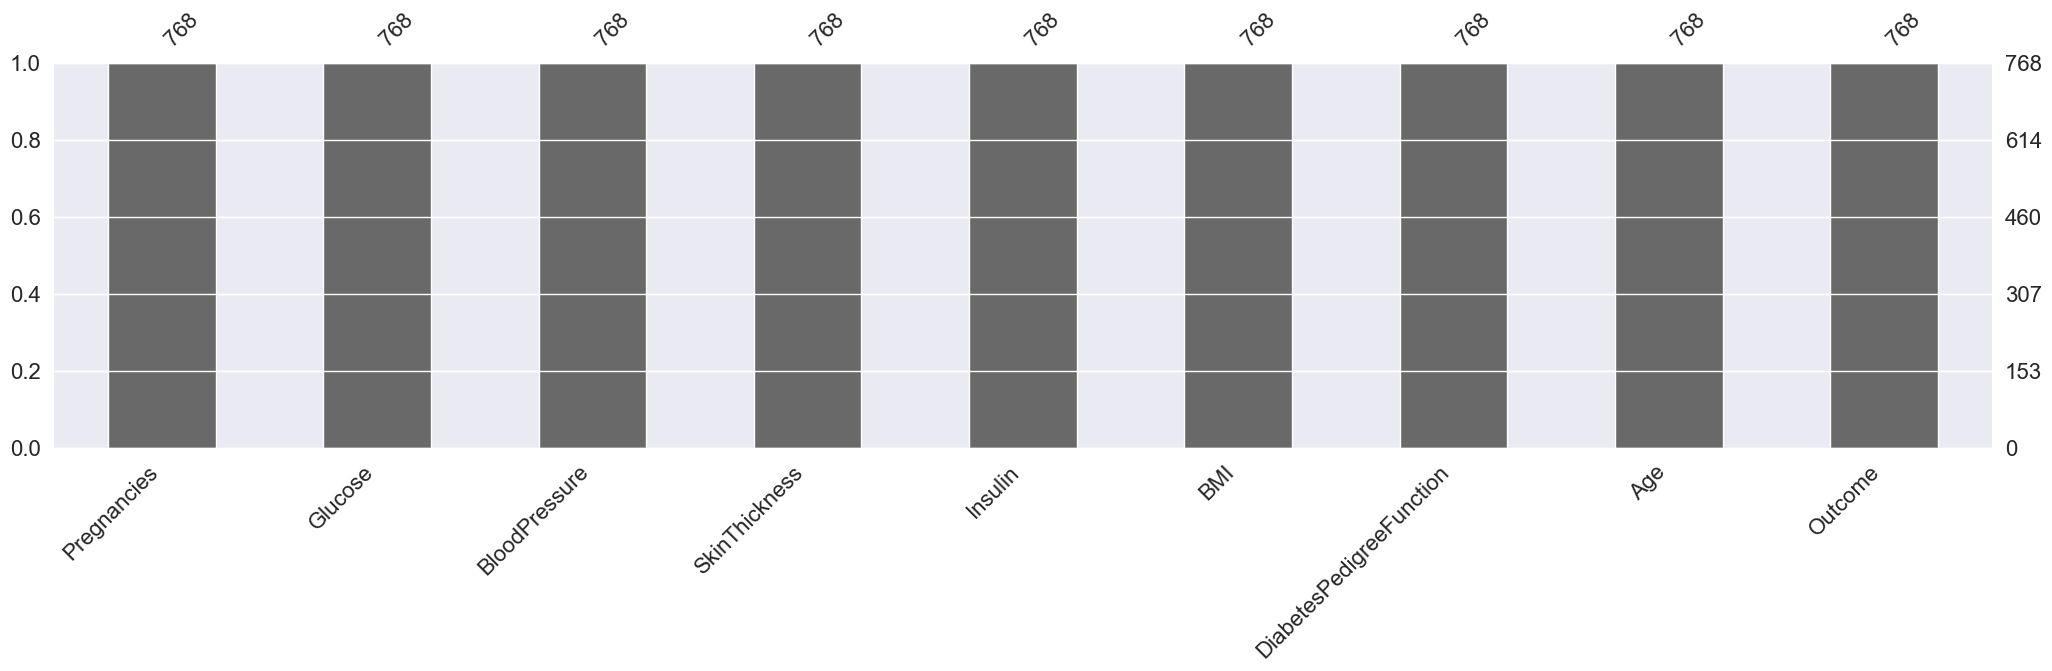

In [17]:
# Plot the missing values bar chart
p = msno.bar(diabetes_dataset, figsize=(25, 5) )

**checking how well our outcome column is balanced**

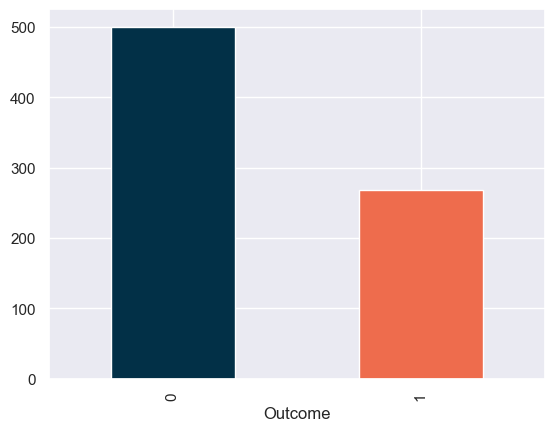

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
color_wheel = {1: "#023047", 2: "#ee6c4d"}

# Map colors based on the "Outcome" column
colors = diabetes_dataset["Outcome"].apply(lambda x: color_wheel.get(x, "#ee6c4d"))

# Plot the bar chart with custom colors
p = diabetes_dataset["Outcome"].value_counts().plot(kind="bar", color=colors)

# Show the plot
plt.show()

diabetes_dataset['Outcome'].value_counts()

0 --> people with non_diabetic

1 --> people with diabetic

In [19]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164


**Identifying Outliers**

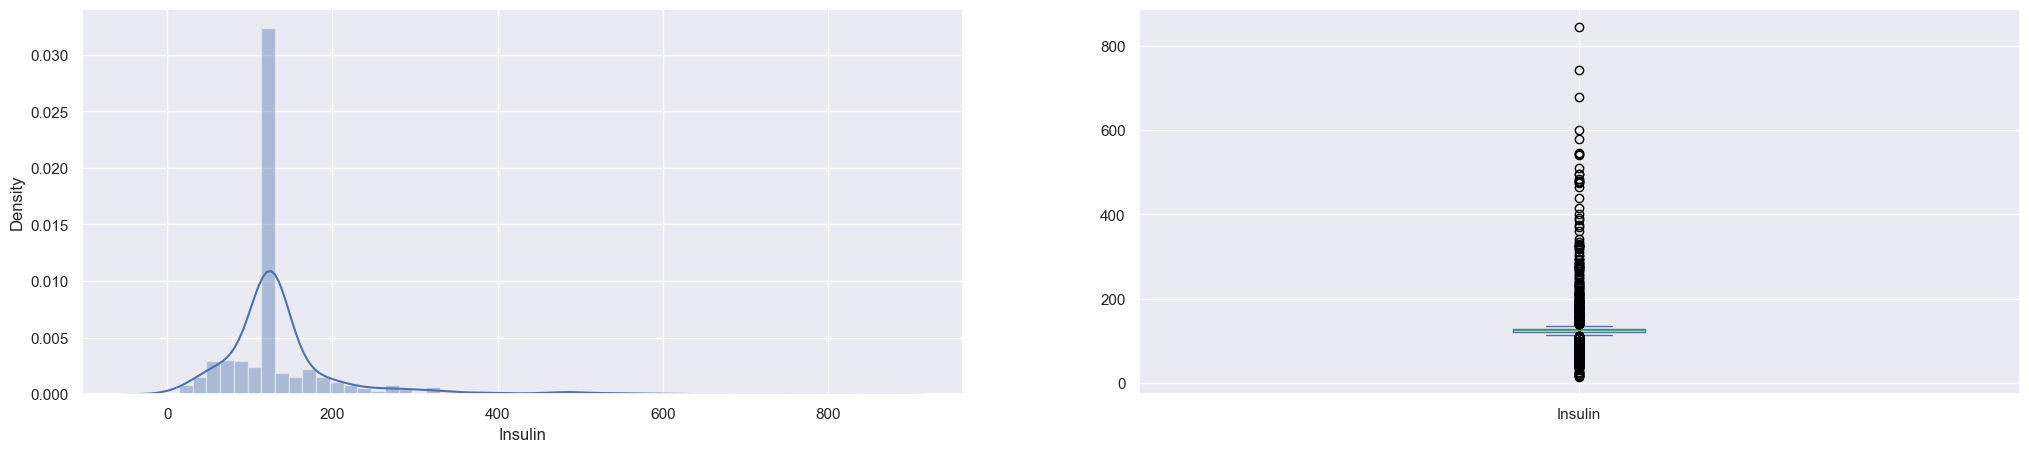

In [23]:
plt.subplot(121), sns.distplot(diabetes_dataset['Insulin'])
plt.subplot(122), diabetes_dataset['Insulin'].plot.box(figsize=(25,5))
plt.show()

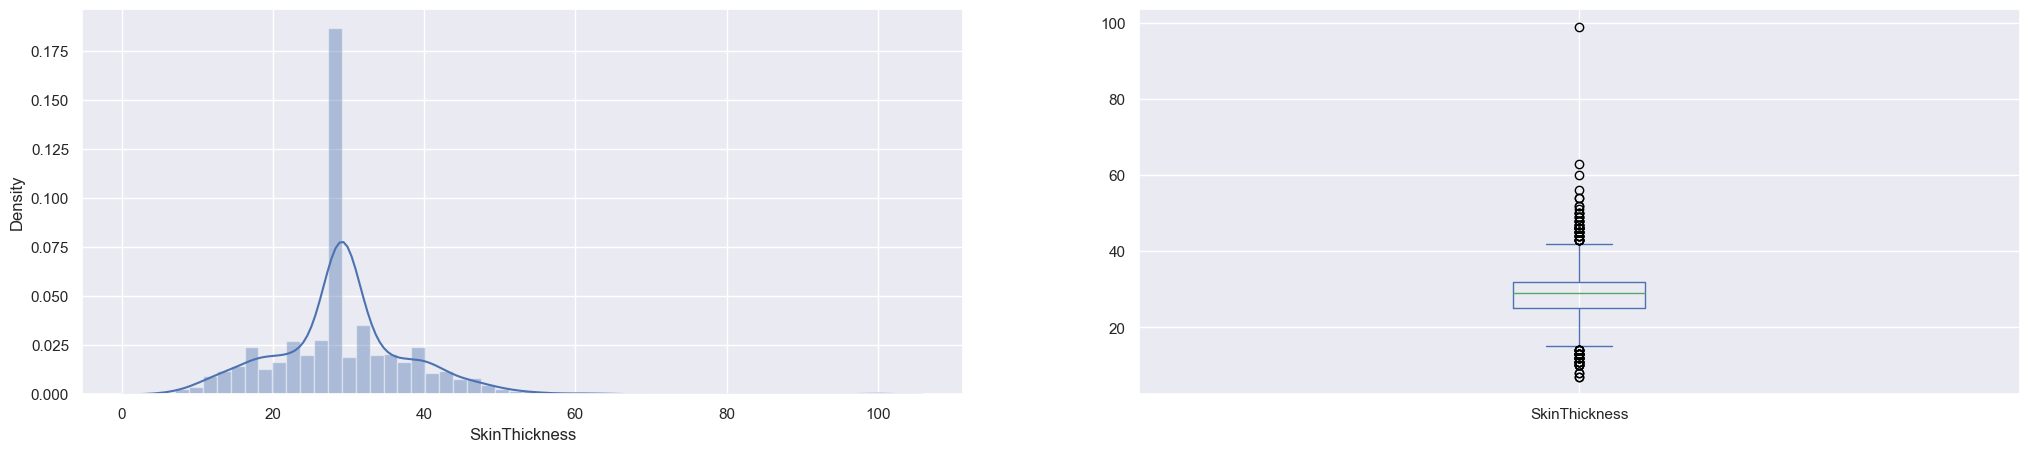

In [24]:
plt.subplot(121), sns.distplot(diabetes_dataset['SkinThickness'])
plt.subplot(122), diabetes_dataset['SkinThickness'].plot.box(figsize=(25,5))
plt.show()

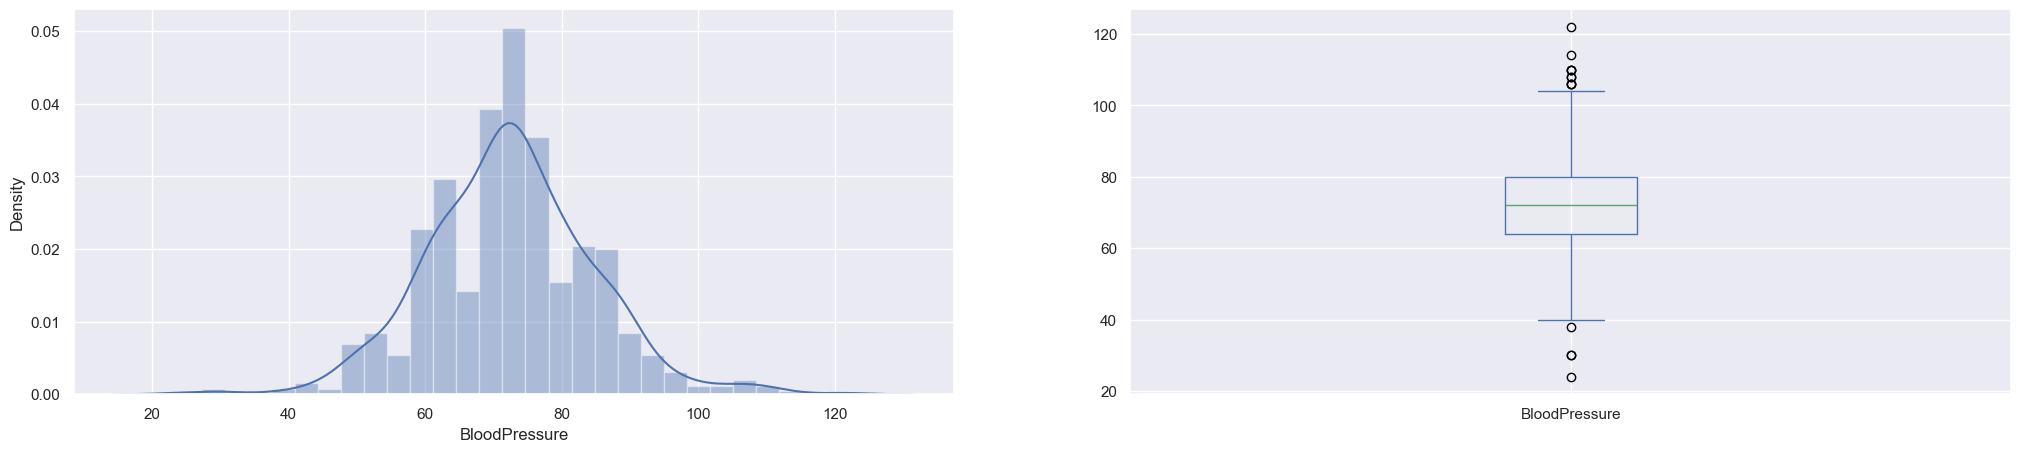

In [26]:
plt.subplot(121), sns.distplot(diabetes_dataset['BloodPressure'])
plt.subplot(122), diabetes_dataset['BloodPressure'].plot.box(figsize=(25,5))
plt.show()

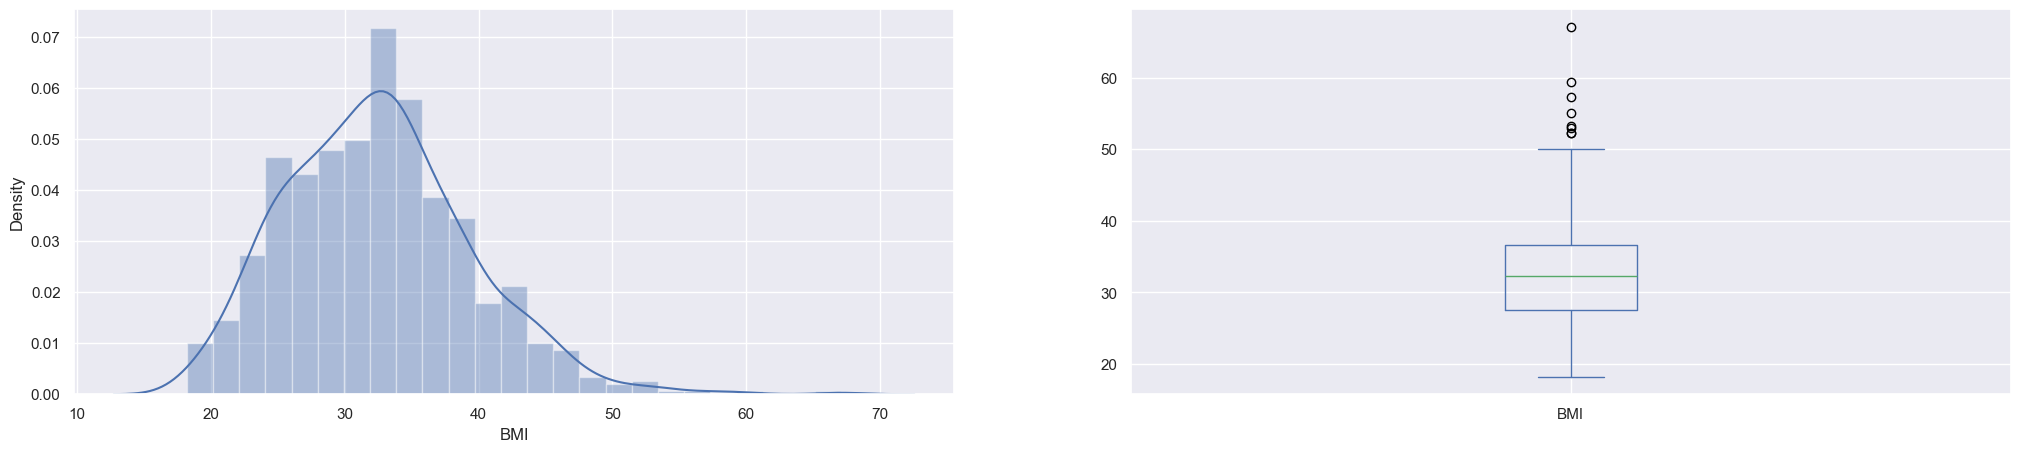

In [27]:
plt.subplot(121), sns.distplot(diabetes_dataset['BMI'])
plt.subplot(122), diabetes_dataset['BMI'].plot.box(figsize=(25,5))
plt.show()

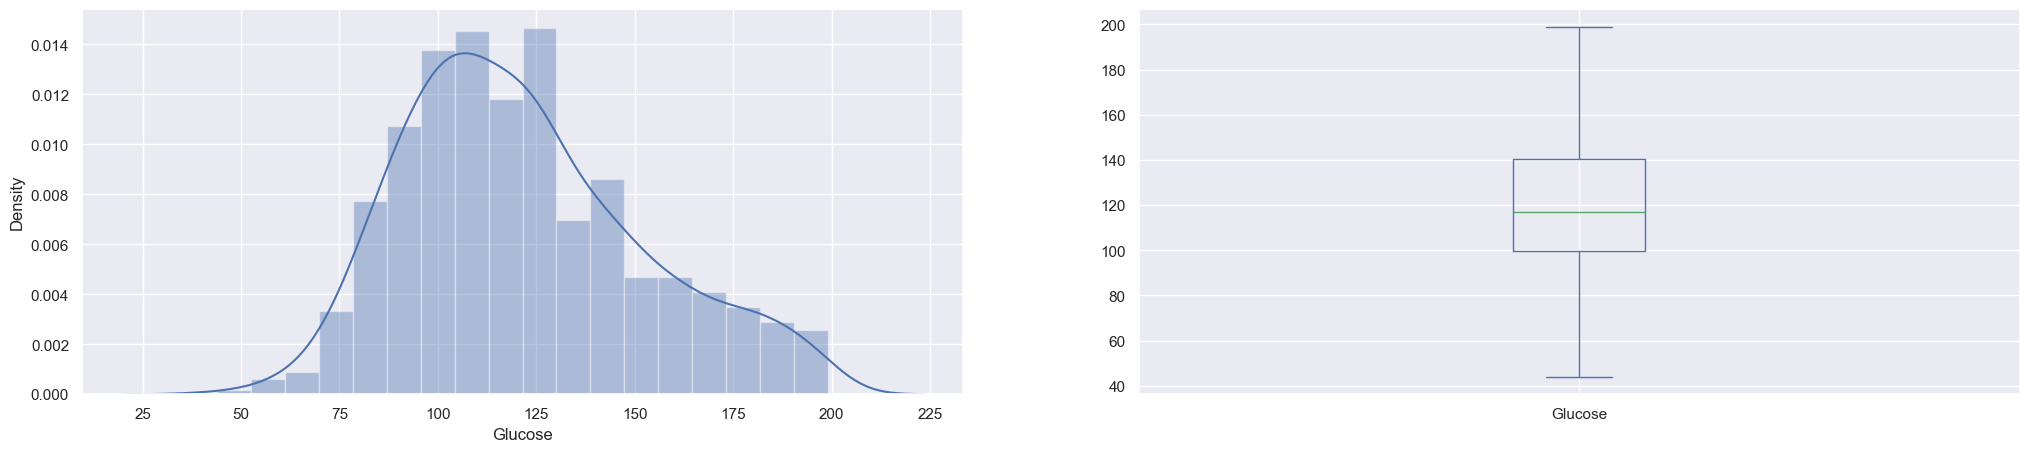

In [28]:
plt.subplot(121), sns.distplot(diabetes_dataset['Glucose'])
plt.subplot(122), diabetes_dataset['Glucose'].plot.box(figsize=(25,5))
plt.show()

**Distplot** can be helpful where one will able to see the distribution of the data as well as with the help of **boxplot one can see the outliers in that column** and other information too which can be derived by the **box and whiskers plot**.

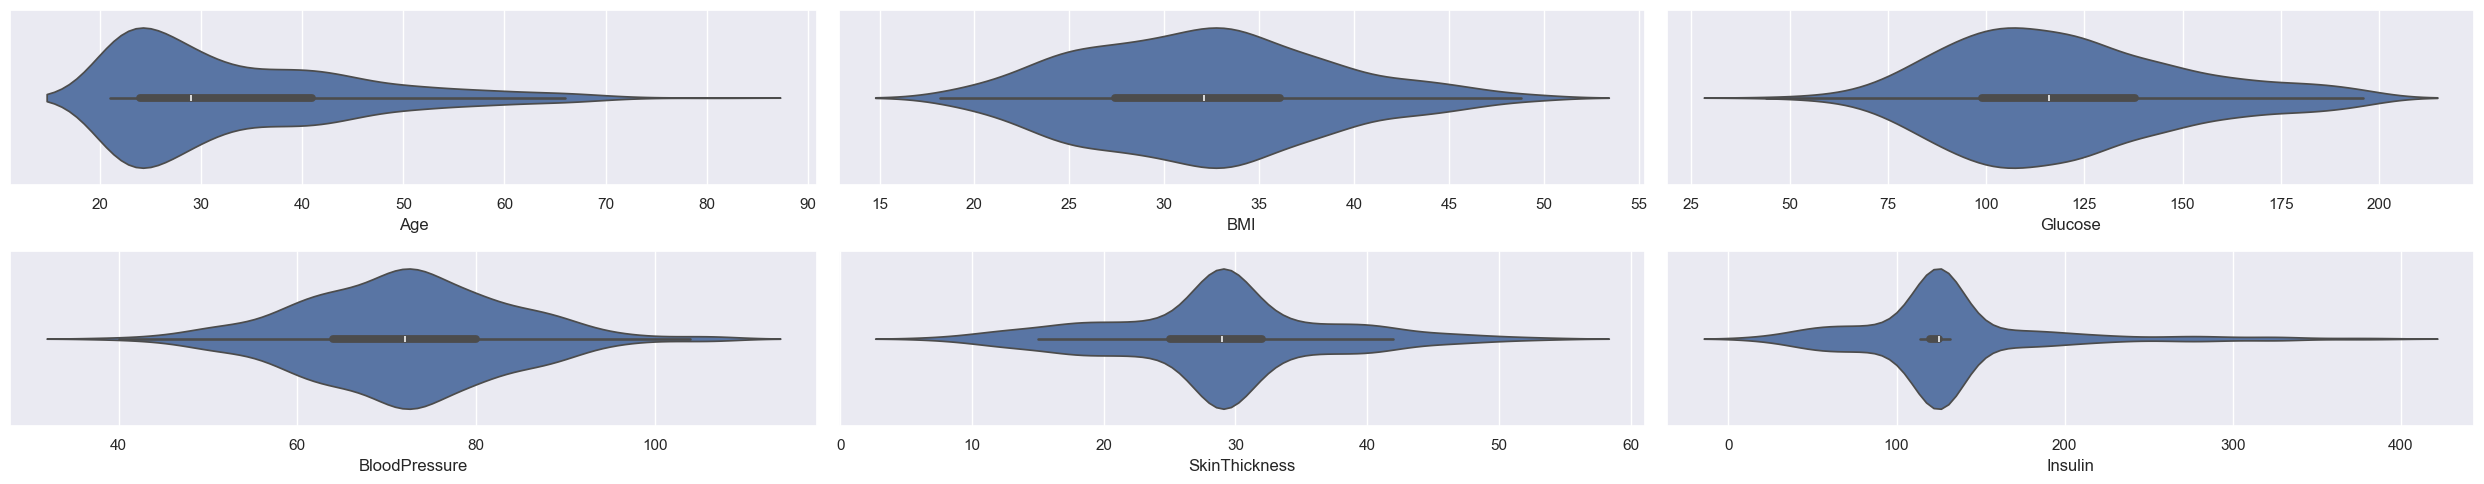

In [64]:
num_vars = ['Age', 'BMI', 'Glucose','BloodPressure','SkinThickness','Insulin']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 5))
axs= axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=diabetes_dataset, ax=axs[i])

fig.tight_layout()

plt.show()

Violin plots also will be helpful identify the distribution of the data

**Removing the outliers**

In [29]:
from scipy import stats

#define a function to remove outliers using z-score for nly selected columns
def remove_outliers(diabetes_dataset, cols,threshhold = 3):
    #loop over each selected columns
    for col in cols:
        z = np.abs(stats.zscore(diabetes_dataset[col]))
        #remove rows with z-score greater than threshold in selected column
        diabetes_dataset = diabetes_dataset[(z < threshhold)| (diabetes_dataset[col].isnull())]
    return diabetes_dataset

selected_cols = ['Insulin','SkinThickness','BloodPressure','BMI','Glucose']
diabetes_dataset = remove_outliers(diabetes_dataset,selected_cols)
diabetes_dataset.shape


(733, 9)

# Correlation between all the features
Correlation between all the features before cleaning

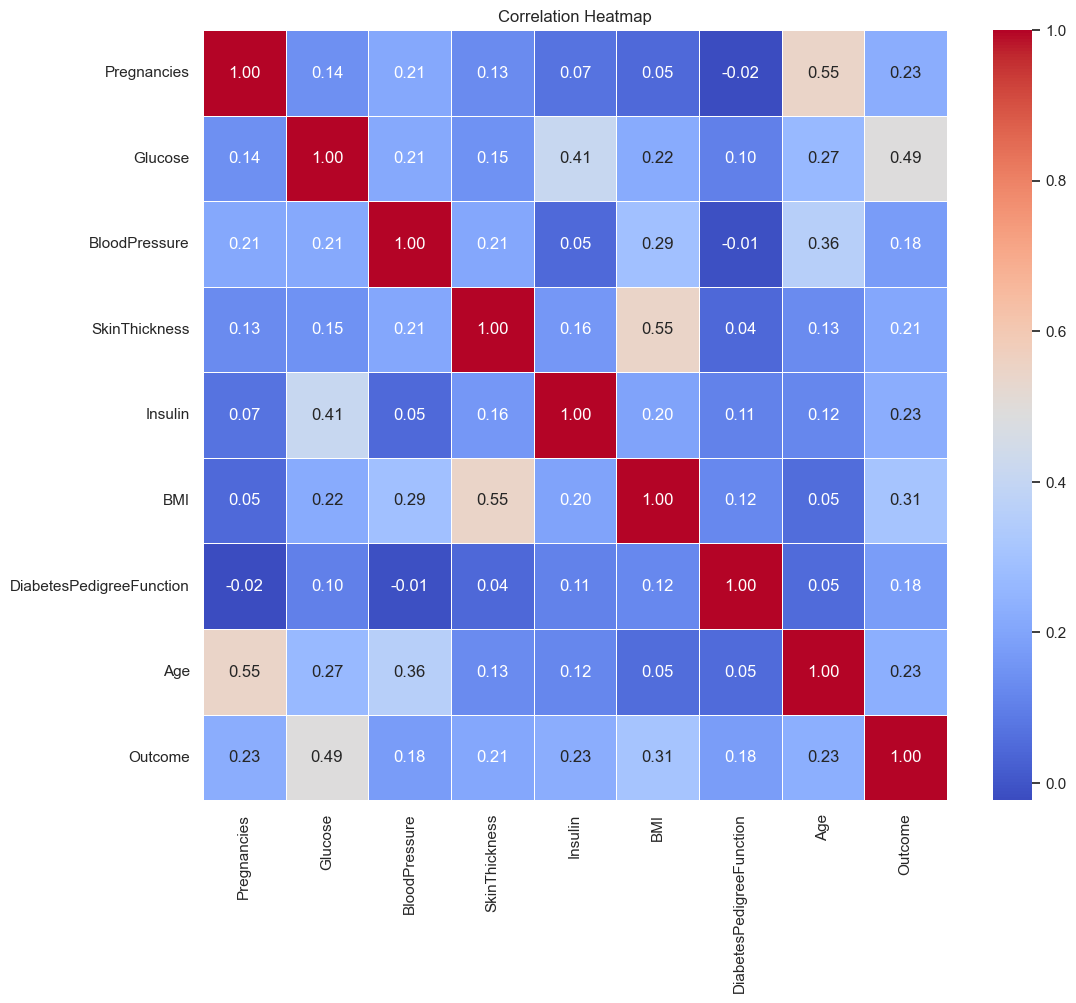

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

**Data Standardization**

Before scaling down how the data looks

In [34]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [35]:
#seperating the data and the labels
X_data = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y_data = diabetes_dataset['Outcome']

In [36]:
print(X_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [37]:
print(Y_data)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 733, dtype: int64


In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(X_data)

StandardScaler()

In [40]:
import pickle


with open('scaler.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [41]:
#from google.colab import files

# Download the converted scaler file to your local machine
#files.download('scaler.sav')

In [42]:
standardized_data = scaler.transform(X_data)

In [43]:
print(standardized_data)

[[ 0.63467142  0.93438714 -0.01722625 ...  0.23773099  0.51999601
   1.43183588]
 [-0.8544904  -1.19080917 -0.54785398 ... -0.85527772 -0.35990624
  -0.18952995]
 [ 1.23033615  2.11505176 -0.72472989 ... -1.37055325  0.66345833
  -0.1041949 ]
 ...
 [ 0.33683906  0.02358873 -0.01722625 ... -0.91773536 -0.69783971
  -0.27486499]
 [-0.8544904   0.1922551  -1.07848171 ... -0.30877336 -0.36628234
   1.17583075]
 [-0.8544904  -0.92094297 -0.19410216 ... -0.26193013 -0.47467609
  -0.8722103 ]]


In [44]:
X_std = standardized_data
Y_std = diabetes_dataset['Outcome']

In [45]:
print(X_std)
print(Y_std)

[[ 0.63467142  0.93438714 -0.01722625 ...  0.23773099  0.51999601
   1.43183588]
 [-0.8544904  -1.19080917 -0.54785398 ... -0.85527772 -0.35990624
  -0.18952995]
 [ 1.23033615  2.11505176 -0.72472989 ... -1.37055325  0.66345833
  -0.1041949 ]
 ...
 [ 0.33683906  0.02358873 -0.01722625 ... -0.91773536 -0.69783971
  -0.27486499]
 [-0.8544904   0.1922551  -1.07848171 ... -0.30877336 -0.36628234
   1.17583075]
 [-0.8544904  -0.92094297 -0.19410216 ... -0.26193013 -0.47467609
  -0.8722103 ]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 733, dtype: int64


**After Standard Scalling**

every value in our dataset is on the same scale which will help our ML model to give a better results.




In [46]:
X =  pd.DataFrame(X_std, columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.634671,0.934387,-0.017226,0.775045,-0.096687,0.237731,0.519996,1.431836
1,-0.854490,-1.190809,-0.547854,0.036923,-0.096687,-0.855278,-0.359906,-0.189530
2,1.230336,2.115052,-0.724730,0.036923,-0.096687,-1.370553,0.663458,-0.104195
3,-0.854490,-1.055876,-0.547854,-0.701199,-0.656582,-0.621062,-0.946508,-1.042880
4,-1.152323,0.563321,-2.847241,0.775045,0.679941,1.721100,5.815350,-0.018860


# **Model Building**

---



**Testing the accuracy through different models**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#seperating the data and the labels
X_data = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y_data = diabetes_dataset['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, stratify=Y_std, random_state=42)
#print(X_std.shape, X_train.shape,X_test.shape)

#--------------------------------------------------------------------------------------------------------------------------------------

#Decision Tree
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
# Train the Decision Tree classifier
dt.fit(X_train, Y_train)
# Accuracy score on training data
dt_training_accuracy = "{:.2f}".format(accuracy_score(dt.predict(X_train), Y_train) * 100)

print("DT_Accuracy of the training data: ", dt_training_accuracy, "%")

# Accuracy score on testing data
dt_testing_accuracy = "{:.2f}".format(accuracy_score(dt.predict(X_test), Y_test) * 100)

print("DT_Accuracy of the Decision Tree Classifier: ", dt_testing_accuracy, "%")

#----------------------------------------------------------------------------------------------------------------------------------------

#Random Forest
# Create a Random Forest classifier
rfc = RandomForestClassifier()
# Train the Random Forest classifier
rfc.fit(X_train, Y_train)
# Accuracy score on training data
rfc_training_accuracy = "{:.2f}".format(accuracy_score(rfc.predict(X_train), Y_train) * 100)

print("\nRFC_Accuracy of the training data: ", rfc_training_accuracy, "%")

# Accuracy score on testing data
rfc_testing_accuracy = "{:.2f}".format(accuracy_score(rfc.predict(X_test), Y_test) * 100)

print("RFC_Accuracy of the Random Forest Classifier: ", rfc_testing_accuracy, "%")

#-----------------------------------------------------------------------------------------------------------------------------------------

#Gradient Boost
# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier()
# Train the Gradient Boosting classifier
gbc.fit(X_train, Y_train)
# Accuracy score on training data
gbc_training_accuracy = "{:.2f}".format(accuracy_score(gbc.predict(X_train), Y_train) * 100)

print("\nGB_Accuracy of the training data: ", gbc_training_accuracy,"%")

# Accuracy score on testing data
gbc_testing_accuracy = "{:.2f}".format(accuracy_score(gbc.predict(X_test), Y_test) * 100)

print("Accuracy of the Gradient Boost Classifier: ", gbc_testing_accuracy,"%")

#------------------------------------------------------------------------------------------------------------------------------------------

#Logistic Regression
# Split the dataset into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_std, Y_std, test_size=0.2, stratify=Y_std, random_state=42)

# Create a Logistic Regression model
lr_model = LogisticRegression()
# Train the Logistic Regression model
lr_model.fit(X1_train, Y1_train)
# Accuracy score on training data
lr_training_accuracy = "{:.2f}".format(accuracy_score(lr_model.predict(X1_train), Y1_train) * 100)

print("\nLR_Accuracy of the training data: ", lr_training_accuracy, "%")

# Accuracy score on testing data
lr_testing_accuracy = "{:.2f}".format(accuracy_score(lr_model.predict(X1_test), Y1_test) * 100)

print("Accuracy of the Logistic Regression: ", lr_testing_accuracy, "%")

#-------------------------------------------------------------------------------------------------------------------------------------------

#Support Vector Machine
#Training the model
svm_model = svm.SVC(kernel = 'linear')
#Model Evaluation
#traning the support vector machine Classifier
svm_model.fit(X1_train,Y1_train)
#accuracy score on the training data
svm_training_accuracy = "{:.2f}".format(accuracy_score(svm_model.predict(X1_train),Y1_train)* 100)
print('\nSVM_Accuracy of the training data ',svm_training_accuracy, "%")

#accuracy score on the training data
svm_testing_accuracy = "{:.2f}".format(accuracy_score(svm_model.predict(X1_test),Y1_test) * 100)
print('Accuracy of the Support Vector Machine ',svm_testing_accuracy, "%")


DT_Accuracy of the training data:  100.00 %
DT_Accuracy of the Decision Tree Classifier:  63.27 %

RFC_Accuracy of the training data:  100.00 %
RFC_Accuracy of the Random Forest Classifier:  78.91 %

GB_Accuracy of the training data:  93.17 %
Accuracy of the Gradient Boost Classifier:  78.91 %

LR_Accuracy of the training data:  76.79 %
Accuracy of the Logistic Regression:  81.63 %

SVM_Accuracy of the training data  76.62 %
Accuracy of the Support Vector Machine  81.63 %


# The Conclusion from Model Building
Logistic regression is the best model for this prediction since it has an accuracy of 82.31 %

# **Feature Importance**

Feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

*As the final step before using machine learning, we will normalize our inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier for us to understand the importance of each feature later, when we’ll be looking at the model weights. We’ll normalize the data such that each variable has 0 mean and standard deviation of 1.

Accuracy = 81.63%


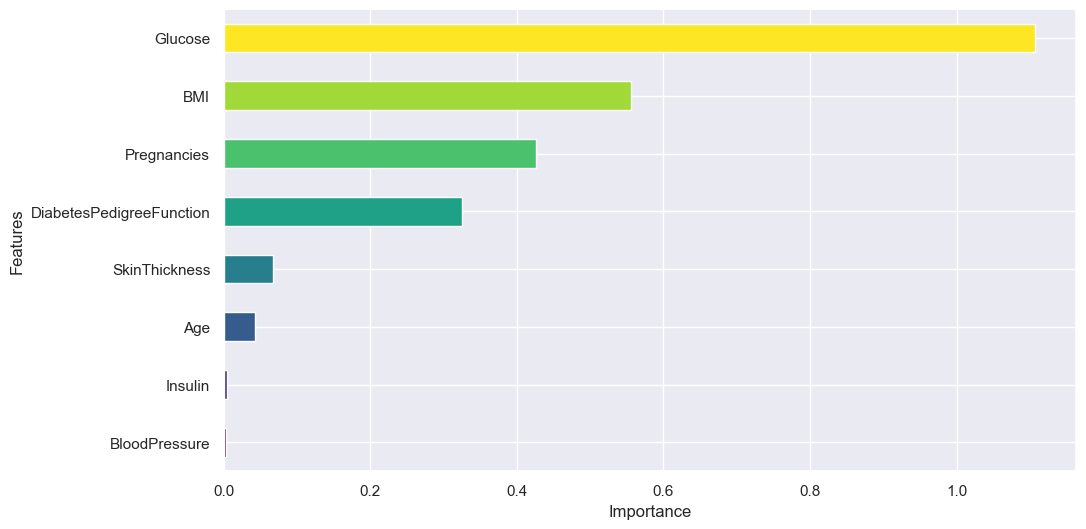

In [48]:
# Assuming you have already defined trainData, testData, Y_train, Y_test
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
trainData = (X_train - means)/stds
testData = (X_test - means)/stds
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

# Create and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(trainData, Y_train)

# Calculate accuracy
accuracy = lr_model.score(testData, Y_test)
print("Accuracy = {:.2f}%".format(accuracy * 100))

# Get coefficients and labels
coeff = list(lr_model.coef_[0])
labels = list(trainData.columns)
# Create a DataFrame for features and their importance
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff
features.sort_values(by=['Importance'], ascending=True, inplace=True)
features['Positive'] = features['Importance'] > 0
features.set_index('Features', inplace=True)

# Plot horizontal bar chart with clear and distinguishable colors
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
features.Importance.plot(kind='barh', figsize=(11, 6), color=colors)
plt.xlabel('Importance')

plt.show()

From the above graph,it is clearly visible that **Glucose is the most important feature in this dataset**.

# ROC_Curve

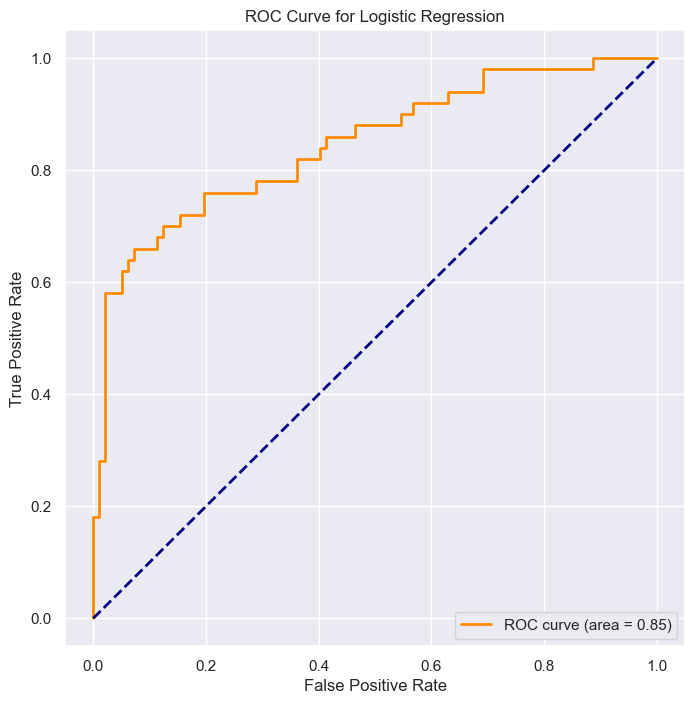

In [49]:
from sklearn.metrics import roc_curve, auc


# Assuming lr_model is your logistic regression model and X_test, Y_test are your test data
lr_probabilities = lr_model.predict_proba(X1_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_test, lr_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')

plt.show()

# Confusion Matrix

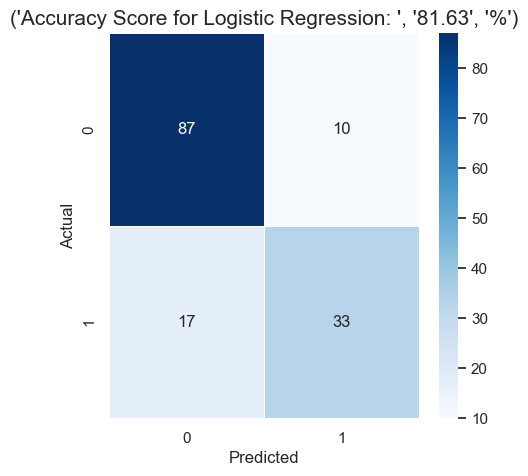

In [50]:
# Calculate confusion matrix for testing data
lr_predictions = lr_model.predict(X1_test)
lr_cm = confusion_matrix(Y1_test, lr_predictions)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data=lr_cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
all_sample_title = ("Accuracy Score for Logistic Regression: ",lr_testing_accuracy,"%")
plt.title(all_sample_title, size=15)
plt.show()

#**Saving the model - Logistic Regression**

---



In [51]:
# Save the trained model to a file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

# Load the model from the file
with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_lr_model = pickle.load(model_file)

In [52]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [53]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,125.0,30.4,0.315,23,0


In [57]:
#6,148,72,35,125,33.6,0.627,50 ->1
#1,85,66,29,125,26.6,0.351,31 -> 0
#8,183,64,29,125,23.3,0.672,32 -> 1
#1,89,66,23,94,28.1,0.167,21 -> 0
#0,137,40,35,168,43.1,2.228,33 -> 1
#10,101,76,48,180,32.9,0.171,63 -> 0
#2,122,70,27,125,36.8,0.340,27 -> 0
#5,121,72,23,112,26.2,0.245,30 -> 0
#1,93,70,31,125,30.4,0.315,23 -> 0

# **Predicting whether patient is diabetic or non diabetic**

---



In [54]:
input_data = (6,148,72,35,125,33.6,0.627,50)

#Changing the input_data numpyarray
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data using the loaded scaler
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = loaded_lr_model.predict(std_data)

print(prediction)

if(prediction[0] == 0):
    print("Person is non diabetic")
else:
    print("Person is diabetic")


[1]
Person is diabetic


# **Conclusion**
---
After using all these patient records, we are able to build a machine learning model (Logistic Regression – best one) to accurately predict patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.